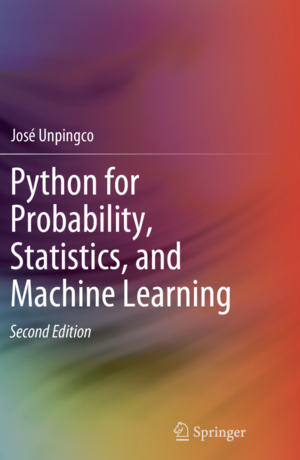

In [1]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

<!-- # TODO: create separate section score statistic (Dobson, p.77) -->
<!-- # TODO: change confusing theta notation (Dobson, p.77) -->
<!-- # TODO: add comment about deviance matching xi^2 DOF in (Dobson, p.) -->
<!-- # TODO: goodness-of-fit analysis (feature selection) Introduction_Generalized_Linear_Models_Madsen -->


Logistic regression is one example of a wider class of Generalized Linear
Models (GLMs). These GLMs have the following three key features

* A target $Y$ variable distributed according to one of the exponential family of distributions (e.g., Normal, binomial, Poisson)

* An equation that links the expected value of $Y$ with a linear combination 
  of the observed variables (i.e., $\left\{ x_1,x_2,\ldots,x_n \right\}$). 

* A smooth invertible *link* function $g(x)$ such that $g(\mathbb{E}(Y)) = \sum_k \beta_k x_k$

### Exponential Family

Here is the one-parameter exponential family,

$$
f(y;\lambda) = e^{\lambda y - \gamma(\lambda)}
$$

 The *natural parameter* is $\lambda$ and $y$ is the sufficient
statistic. For example, for logistic regression, we have
$\gamma(\lambda)=-\log(1+e^{\lambda})$ and $\lambda=\log{\frac{p}{1-p}}$. 

An important property of this exponential family is that

<!-- Equation labels as ordinary links -->
<div id="eq:dgamma"></div>

$$
\begin{equation}
\mathbb{E}_{\lambda}(y) = \frac{d\gamma(\lambda)}{d\lambda}=\gamma'(\lambda)
\end{equation}
\label{eq:dgamma} \tag{1}
$$

 To see this, we compute the following,

$$
\begin{align*}
1 &=  \int f(y;\lambda) dy  =  \int e^{\lambda y - \gamma(\lambda)} dy \\
0 &=  \int \frac{df(y;\lambda)}{d\lambda} dy =\int e^{\lambda y-\gamma (\lambda)} \left(y-\gamma'(\lambda)\right) dy  \\
\int y e^{\lambda  y-\gamma (\lambda )} dy &= \mathbb{E}_{\lambda}(y)=\gamma'(\lambda ) 
\end{align*}
$$

 Using the same technique, we also have,

$$
\mathbb{V}_{\lambda}(Y) = \gamma''(\lambda)
$$

 which explains the usefulness of this generalized notation for the
exponential family.

### Deviance

The scaled Kullback-Leibler divergence is called the *deviance* as
defined below,

$$
D(f_1,f_2) = 2 \int f_1(y) \log{\frac{f_1(y)}{f_2(y)}}dy
$$

**Hoeffding's Lemma.**

Using our exponential family notation, we can write out the deviance as
the following,

$$
\begin{align*}
\frac{1}{2} D(f(y;\lambda_1), f(y;\lambda_2)) & = \int f(y;\lambda_1)\log \frac{f(y;\lambda_1)}{f(y;\lambda_2)}  dy   \\
                                              & = \int f(y;\lambda_1) ((\lambda_1-\lambda_2) y -(\gamma(\lambda_1)-\gamma(\lambda_2))) dy \\
                                              & = \mathbb{E}_{\lambda_1}  [ (\lambda_1-\lambda_2) y -(\gamma(\lambda_1)-\gamma(\lambda_2)) ] \\
                                              & = (\lambda_1-\lambda_2) \mathbb{E}_{\lambda_1}(y) -(\gamma(\lambda_1)-\gamma(\lambda_2)) \\
                                              & = (\lambda_1-\lambda_2) \mu_1 -(\gamma(\lambda_1)-\gamma(\lambda_2)) 
\end{align*}
$$

 where $\mu_1:=\mathbb{E}_{\lambda_1}(y)$. For the maximum likelihood
estimate $\hat{\lambda}_1$, we have $\mu_1=y$. Plugging this
into the above equation gives the following,

$$
\begin{align*}
\frac{1}{2} D(f(y;\hat{\lambda}_1),f(y;\lambda_2))&=(\hat{\lambda}_1-\lambda_2) y -(\gamma(\hat{\lambda}_1)-\gamma(\lambda_2))  \\
&= \log{f(y;\hat{\lambda}_1)} - \log{f(y;\lambda_2)} \\
&= \log\frac{f(y;\hat{\lambda}_1)}{f(y;\lambda_2)}
\end{align*}
$$

 Taking the negative exponential of both sides gives,

$$
f(y;\lambda_2) = f(y;\hat{\lambda}_1) e^{-\frac{1}{2} D(f(y;\hat{\lambda}_1),f(y;\lambda_2)) }
$$

 Because $D$ is always non-negative, the likelihood
is maximized when the the deviance is zero. In particular,
for the scalar case, it means that $y$ itself is the
best maximum likelihood estimate for the mean. Also,
$f(y;\hat{\lambda}_1)$ is called the *saturated* model.
We write Hoeffding's Lemma as the following,

<!-- Equation labels as ordinary links -->
<div id="eq:lemma"></div>

$$
\begin{equation}
f(y;\mu) = f(y;y)e^{-\frac{1}{2} D(f(y;y),f(y;\mu))} 
\end{equation}
\label{eq:lemma} \tag{2}
$$

  to emphasize that $f(y;y)$ is the likelihood function when the 
mean is replaced by the sample itself and $f(y;\mu)$ is the likelihood function 
when the mean is replaced by $\mu$.



Vectorizing Equation ([2](#eq:lemma)) using mutual independence gives the
following,

$$
f(\mathbf{y};\boldsymbol{\mu}) = e^{-\sum_i D(y_i,\mu_i)} \prod f(y_i;y_i)
$$

 The idea now is to minimize the deviance by deriving,

$$
\boldsymbol{\mu}(\boldsymbol{\beta}) = g^{-1}(\mathbf{M}^T\boldsymbol{\beta})
$$

 This means the the MLE $\hat{\boldsymbol{\beta}}$ is the
best $p\times 1$ vector $\boldsymbol{\beta}$ that minimizes the
total deviance where $g$ is the *link* function and $\mathbf{M}$ is
the $p\times n$ *structure* matrix. This is the key step with GLM
estimation because it reduces the number of parameters from $n$ to
$p$. The structure matrix is where the associated $x_i$ data enters
into the problem.  Thus, GLM maximum likelihood fitting minimizes the
total deviance like plain linear regression minimizes the sum of
squares.

With the following,

$$
\boldsymbol{\lambda} = \mathbf{M}^T \boldsymbol{\beta}
$$

 with $2\times n$ dimensional $\mathbf{M}$.  The corresponding joint
density function is the following,

$$
f(\mathbf{y};\beta)=e^{\boldsymbol{\beta}^T\boldsymbol{\xi}-\psi(\boldsymbol{\beta})} f_0(\mathbf{y})
$$

 where

$$
\boldsymbol{\xi} = \mathbf{M} \mathbf{y}
$$

 and

$$
\psi(\boldsymbol{\beta}) = \sum \gamma(\mathbf{m}_i^T \boldsymbol{\beta})
$$

 where now the sufficient statistic is $\boldsymbol{\xi}$ and the
parameter vector is $\boldsymbol{\beta}$, which fits into our exponential
family format, and $\mathbf{m}_i$  is the $i^{th}$ column of $\mathbf{M}$. 

Given this joint density, we can compute the log likelihood as the following,

$$
\ell = \boldsymbol{\beta}^T\boldsymbol{\xi}-\psi(\boldsymbol{\beta})
$$

 To maximize this likelihood, we take the derivative of this with
respect to $\boldsymbol{\beta}$ to obtain the following,

$$
\frac{d\ell}{d\boldsymbol{\beta}}=\mathbf{M}\mathbf{y}-\mathbf{M}\boldsymbol{\mu}(\mathbf{M}^T\boldsymbol{\beta})
$$

 since $\gamma'(\mathbf{m}_i^T \boldsymbol{\beta}) =
\mathbf{m}_i^T \mu_i(\boldsymbol{\beta})$ and (c.f. Equation ([1](#eq:dgamma))), 
$\gamma' = \mu_{\lambda}$. 
Setting this derivative equal to zero gives the conditions
for the maximum likelihood solution,

<!-- Equation labels as ordinary links -->
<div id="eq:conditions"></div>

$$
\begin{equation}
\mathbf{M}(\mathbf{y}- \boldsymbol{\mu}(\mathbf{M}^T\boldsymbol{\beta})) = \mathbf{0}
\end{equation}
\label{eq:conditions} \tag{3}
$$

 where $\boldsymbol{\mu}$ is the element-wise inverse of the link function. This 
leads us to exactly the same place we started: trying to regress $\mathbf{y}$ against 
$\boldsymbol{\mu}(\mathbf{M}^T\boldsymbol{\beta})$. 

### Example

The structure matrix $\mathbf{M}$ is where the $x_i$ data 
associated with the corresponding $y_i$ enters the problem. If we choose

$$
\mathbf{M}^T = [\mathbf{1}, \mathbf{x}]
$$

 where $\mathbf{1}$ is an $n$-length vector and

$$
\boldsymbol{\beta} = [\beta_0, \beta_1]^T
$$

 with $\mu(x) = 1/(1+e^{-x})$, we have the original logistic regression problem.

Generally, $\boldsymbol{\mu}(\boldsymbol{\beta})$ is a nonlinear
function and thus we regress against our transformed variable $\mathbf{z}$

$$
\mathbf{z} = \mathbf{M}^T\boldsymbol{\beta} + \diag(g'(\boldsymbol{\mu}))(\mathbf{y}-\boldsymbol{\mu}(\mathbf{M}^T\boldsymbol{\beta}))
$$

 This fits the format of the Gauss Markov
(see [ch:stats:sec:gauss](#ch:stats:sec:gauss)) problem and has the 


following solution,

<!-- Equation labels as ordinary links -->
<div id="eq:bhat"></div>

$$
\begin{equation}
\hat{\boldsymbol{\beta}}=(\mathbf{M} \mathbf{R}_z^{-1}\mathbf{M}^T)^{-1}\mathbf{M} \mathbf{R}_z^{-1}\mathbf{z}
\end{equation}
\label{eq:bhat} \tag{4}
$$

 where

$$
\mathbf{R}_z:=\mathbb{V}(\mathbf{z})=\diag(g'(\boldsymbol{\mu}))^2\mathbf{R}=\mathbf{v}(\mu)\diag(g'(\boldsymbol{\mu}))^2\mathbf{I}
$$

 where $g$ is the link function and $\mathbf{v}$ is the variance
function on the designated distribution of the $y_i$.
Thus, $\hat{\boldsymbol{\beta}}$ has the following covariance matrix,

$$
\mathbb{V}(\hat{\boldsymbol{\beta}}) = (\mathbf{M}\mathbf{R}_z^{-1}\mathbf{M}^T)^{-1}
$$

 These results allow inferences about the estimated parameters
$\hat{\boldsymbol{\beta}}$.  We can easily write Equation ([4](#eq:bhat))
as an iteration as follow,

$$
\hat{\boldsymbol{\beta}}_{k+1}=(\mathbf{M} \mathbf{R}_{z_k}^{-1}\mathbf{M}^T)^{-1}\mathbf{M} \mathbf{R}_{z_k}^{-1}\mathbf{z}_k
$$

### Example

Consider the data shown in [Figure](#fig:glm_003). Note that the variance of
the data increases for each $x$ and the data increases as a power of $x$ along
$x$. This makes this data a good candidate for a Poisson GLM with $g(\mu) =
\log(\mu)$.

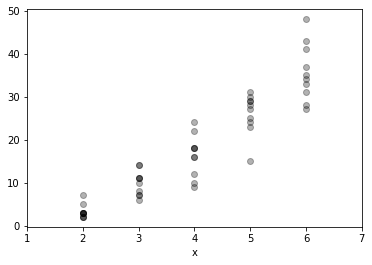

In [2]:
%matplotlib inline

from scipy.stats.distributions import poisson
import statsmodels.api as sm
from matplotlib.pylab import subplots
import numpy as np

def gen_data(n,ns=10):
    param = n**2
    return poisson(param).rvs(ns)

fig,ax=subplots()
xi = []
yi = []
for i in [2,3,4,5,6]:
    xi.append([i]*10)
    yi.append(gen_data(i))
    _=ax.plot(xi[-1],yi[-1],'ko',alpha=.3)

_=ax.axis(xmin=1,xmax=7)
xi = np.array(xi)
yi = np.array(yi)
x = xi.flatten()
y = yi.flatten()
_=ax.set_xlabel('x');
fig.savefig('fig-machine_learning/glm_003.png')

<!-- dom:FIGURE: [fig-machine_learning/glm_003.png, width=500 frac=0.55] Some data for Poisson example.  <div id="fig:glm_003"></div> -->
<!-- begin figure -->
<div id="fig:glm_003"></div>

<p>Some data for Poisson example.</p>
<img src="fig-machine_learning/glm_003.png" width=500>

<!-- end figure -->


We can use our iterative matrix-based approach. The following code 
initializes the iteration.

In [3]:
M   = np.c_[x*0+1,x].T
gi  = np.exp             # inverse g link function
bk  = np.array([.9,0.5]) # initial point
muk = gi(M.T @ bk).flatten() 
Rz  = np.diag(1/muk)
zk  = M.T @ bk + Rz @ (y-muk)

 and this next block establishes the main iteration

In [4]:
while abs(sum(M @ (y-muk))) > .01: # orthogonality condition as threshold
   Rzi = np.linalg.inv(Rz)
   bk = (np.linalg.inv(M @ Rzi @ M.T)) @ M @ Rzi @ zk
   muk = gi(M.T @ bk).flatten()
   Rz =np.diag(1/muk)
   zk = M.T @ bk + Rz @ (y-muk)

 with corresponding final $\boldsymbol{\beta}$ computed as the 
following,

In [5]:
print(bk)

[0.72758176 0.48763741]


 with corresponding estimated $\mathbb{V}(\hat{\boldsymbol{\beta}})$ as

In [6]:
print(np.linalg.inv(M @ Rzi @ M.T))

[[ 0.01850392 -0.0035621 ]
 [-0.0035621   0.00072885]]


 The orthogonality condition Equation ([3](#eq:conditions)) is the following,

In [7]:
print(M @ (y-muk))

[-4.90472131e-05 -2.62970365e-04]


For comparison, the `statsmodels` module provides the Poisson GLM object.
Note that the reported standard error is the square root of the 
diagonal elements of $\mathbb{V}(\hat{\boldsymbol{\beta}})$. A plot of 
the data and the fitted model is shown below in Figure ([fig:glm_004](#fig:glm_004)).

In [8]:
pm=sm.GLM(y, sm.tools.add_constant(x), 
                        family=sm.families.Poisson())
pm_results=pm.fit()
pm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -143.03
Date:                Tue, 27 Aug 2019   Deviance:                       63.998
Time:                        13:19:09   Pearson chi2:                     62.0
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7276      0.136      5.348      0.000       0.461       0.994
x1             0.4876      0.027     18.060      0.000       0.435       0.541
==============================================================================
"""

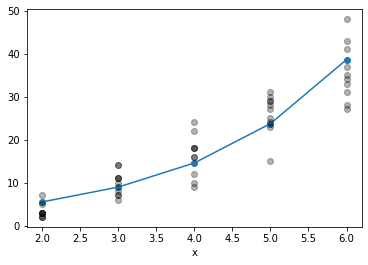

In [9]:
b0,b1=pm_results.params
fig,ax=subplots()
_=ax.plot(xi[:,0],np.exp(xi[:,0]*b1+b0),'-o');
_=ax.plot(xi,yi,'ok',alpha=.3);
fig.savefig('fig-machine_learning/glm_004.png')
_=ax.set_xlabel('x');

<!-- dom:FIGURE: [fig-machine_learning/glm_004.png, width=500 frac=0.55] Fitted using the Poisson GLM.   <div id="fig:glm_004"></div> -->
<!-- begin figure -->
<div id="fig:glm_004"></div>

<p>Fitted using the Poisson GLM.</p>
<img src="fig-machine_learning/glm_004.png" width=500>

<!-- end figure -->


<!-- #  Good reference [[efron2016computer]](#efron2016computer) -->
<!-- #  [[fox2015applied]](#fox2015applied) -->
<!-- #  [[lindsey1997applying]](#lindsey1997applying) -->

<!-- # *Applied Predictive Modeling by Kuhn*, p. 283, -->
<!-- # *generalized linear models by Rodriguez*, p.72, p. 119 -->